In [2]:
import numpy as np
import pylab as pl

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv("bladder_cancer.csv")
data.head(3)

,Amp_1MHz,Phase_1MHz,Amp_500kHz,Phase_500kHz,Amp_100kHz,Phase_100kHz,Amp_50kHz,Phase_50kHz,Amp_10kHz,Phase_10kHz,Label
0,1826.379159,-83.458529,3578.605538,-85.824932,17848.77353,-85.555033,30923.77481,-84.679487,121151.8394,-79.349716,1
1,1822.430390,-83.707765,3588.429488,-85.421176,17537.29920,-87.164969,31855.09213,-88.802440,121616.4272,-78.980499,1
2,1824.105505,-83.823186,3532.988697,-85.372390,16429.97769,-87.916345,31066.25861,-83.519898,121313.6036,-79.646773,1


In [4]:
# pd.set_option('display.max_rows',None) # pandas 의 row 값을 모두 보고 싶을 때 설정하는 option
data.isnull().sum()

Amp_1MHz         2
Phase_1MHz       2
Amp_500kHz       3
Phase_500kHz     3
Amp_100kHz       3
Phase_100kHz     3
Amp_50kHz       14
Phase_50kHz     14
Amp_10kHz       12
Phase_10kHz     12
Label            0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

Amp_1MHz        0
Phase_1MHz      0
Amp_500kHz      0
Phase_500kHz    0
Amp_100kHz      0
Phase_100kHz    0
Amp_50kHz       0
Phase_50kHz     0
Amp_10kHz       0
Phase_10kHz     0
Label           0
dtype: int64

In [7]:
data[0:1]

,Amp_1MHz,Phase_1MHz,Amp_500kHz,Phase_500kHz,Amp_100kHz,Phase_100kHz,Amp_50kHz,Phase_50kHz,Amp_10kHz,Phase_10kHz,Label
0,1826.379159,-83.458529,3578.605538,-85.824932,17848.77353,-85.555033,30923.77481,-84.679487,121151.8394,-79.349716,1


In [8]:

X = data.drop(columns=['Label'], axis=1)
y = data['Label']

In [9]:
# train_set with cross-validation : test_set = 80 : 20 
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [10]:
print(train_feature.shape)
print(test_feature.shape)
print(train_label.shape)
print(test_label.shape)

(188, 10)
(48, 10)
(188,)
(48,)


In [11]:
# feature normalization, label 은 normalization 진행하지 않았음
scaler = StandardScaler() # scaler 객체 생성
scaler.fit(train_feature) # train_feature 의 mean 과 standard deviation 값을 추출
train_feature_scaled = scaler.transform(train_feature) # train_feature 의 정규화 진행
test_feature_scaled = scaler.transform(test_feature) # test_feature 의 정규화 진행.
# test_feature 는 mean 과 standard deviation 값을 추출하는 과정 하면 안됨. 
# 학습할 때와 동일한 기반 설정으로 동일하게 테스트 데이터를 변환되야 함. 

In [12]:
# np.arange(start,stop,step)
C_range = 10. ** np.arange(0,0.5,0.005) # 1-(0.5)/10
#print(C_range)
gamma_range = 10. ** np.arange(-2,0,0.02) # 0-(-2)/10
#print(gamma_range)


In [13]:
param_grid = dict(gamma=gamma_range , C=C_range)
print(param_grid)

{'gamma': array([0.01      , 0.01047129, 0.01096478, 0.01148154, 0.01202264,
       0.01258925, 0.01318257, 0.01380384, 0.0144544 , 0.01513561,
       0.01584893, 0.01659587, 0.01737801, 0.01819701, 0.01905461,
       0.01995262, 0.02089296, 0.02187762, 0.02290868, 0.02398833,
       0.02511886, 0.02630268, 0.02754229, 0.02884032, 0.03019952,
       0.03162278, 0.03311311, 0.03467369, 0.03630781, 0.03801894,
       0.03981072, 0.04168694, 0.04365158, 0.04570882, 0.04786301,
       0.05011872, 0.05248075, 0.05495409, 0.05754399, 0.06025596,
       0.06309573, 0.06606934, 0.0691831 , 0.0724436 , 0.07585776,
       0.07943282, 0.08317638, 0.08709636, 0.09120108, 0.09549926,
       0.1       , 0.10471285, 0.10964782, 0.11481536, 0.12022644,
       0.12589254, 0.13182567, 0.13803843, 0.14454398, 0.15135612,
       0.15848932, 0.16595869, 0.17378008, 0.18197009, 0.19054607,
       0.19952623, 0.20892961, 0.21877616, 0.22908677, 0.23988329,
       0.25118864, 0.2630268 , 0.27542287, 0.2884031

In [14]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = StratifiedKFold(5)) # k = 5

grid.fit(train_feature_scaled, train_label)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': array([1.        , 1.01157945, 1.02329299, 1.03514217, 1.04712855,
       1.05925373, 1.07151931, 1.08392691, 1.0964782 , 1.10917482,
       1.12201845, 1.13501082, 1.14815362, 1.16144861, 1.17489755,
       1.18850223, 1.20226443, 1.216186  , 1.23026877, 1.24451461,
       1.25892541, 1.27350308, 1.28...
       0.19952623, 0.20892961, 0.21877616, 0.22908677, 0.23988329,
       0.25118864, 0.2630268 , 0.27542287, 0.28840315, 0.30199517,
       0.31622777, 0.33113112, 0.34673685, 0.36307805, 0.3801894 ,
       0.39810717, 0.41686938, 0.43651583, 0.45708819, 0.47863009,
       0.50118723, 0.52480746, 0.54954087, 0.57543994, 0.60255959,
       0.63095734, 0.66069345, 0.69183097, 0.72443596, 0.75857758,
       0.79432823, 0.83176377, 0.87096359, 0.91201084, 0.95499259])})

In [15]:
# best parameter 추출 & best score

best_parameter=grid.best_estimator_

print("best_parameter:", grid.best_estimator_)
print("best_score:", grid.best_score_)

best_parameter: SVC(C=1.566751070108149, gamma=0.1380384264602888)
best_score: 0.9365576102418208


In [16]:
# test set 예측

predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.9166666666666666

In [17]:

results_df = pd.DataFrame(grid.cv_results_)
results_df.head(5)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001799,0.000746,0.001199,0.000401,1.0,0.01,"{'C': 1.0, 'gamma': 0.01}",0.842105,0.736842,0.684211,0.810811,0.864865,0.787767,0.067446,9799
1,0.001193,0.000406,0.000790,0.000395,1.0,0.010471,"{'C': 1.0, 'gamma': 0.010471285480508996}",0.842105,0.736842,0.684211,0.837838,0.864865,0.793172,0.070107,9598
2,0.000997,0.000003,0.000992,0.000011,1.0,0.010965,"{'C': 1.0, 'gamma': 0.01096478196143185}",0.842105,0.736842,0.684211,0.837838,0.864865,0.793172,0.070107,9598
3,0.001194,0.000398,0.000998,0.000002,1.0,0.011482,"{'C': 1.0, 'gamma': 0.01148153621496883}",0.842105,0.736842,0.684211,0.837838,0.864865,0.793172,0.070107,9598
4,0.001189,0.000399,0.001199,0.000415,1.0,0.012023,"{'C': 1.0, 'gamma': 0.012022644346174132}",0.842105,0.736842,0.710526,0.837838,0.864865,0.798435,0.062280,9559


In [18]:
df_pivot_mean=results_df.pivot_table(values = 'mean_test_score', index='param_C', columns ='param_gamma')
df_pivot_mean

param_gamma,0.010000,0.010471,0.010965,0.011482,0.012023,0.012589,0.013183,0.013804,0.014454,0.015136,...,0.630957,0.660693,0.691831,0.724436,0.758578,0.794328,0.831764,0.870964,0.912011,0.954993
param_C,,,,,,,,,,,,,,,,,,,,,
1.000000,0.787767,0.793172,0.793172,0.793172,0.798435,0.803698,0.798435,0.803698,0.808962,0.808962,...,0.83542,0.830156,0.835420,0.840825,0.851351,0.86202,0.856472,0.796871,0.670555,0.616643
1.011579,0.787767,0.793172,0.793172,0.793172,0.793172,0.798435,0.798435,0.803698,0.808962,0.808962,...,0.83542,0.830156,0.840825,0.840825,0.851351,0.86202,0.851209,0.797013,0.696871,0.616643
1.023293,0.793172,0.793172,0.793172,0.793172,0.793172,0.798435,0.793172,0.803698,0.808962,0.808962,...,0.83542,0.830156,0.840825,0.840825,0.851351,0.86202,0.851209,0.802418,0.696871,0.637980
1.035142,0.793172,0.793172,0.793172,0.793172,0.793172,0.793172,0.793172,0.803698,0.808962,0.808962,...,0.83542,0.830156,0.840825,0.840825,0.851351,0.86202,0.851209,0.807824,0.691465,0.665007
1.047129,0.793172,0.793172,0.793172,0.793172,0.793172,0.793172,0.798435,0.808962,0.808962,0.803698,...,0.83542,0.830156,0.840825,0.840825,0.851351,0.86202,0.851209,0.813229,0.696871,0.670270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.985383,0.830299,0.830299,0.835562,0.840825,0.840825,0.851494,0.840825,0.840825,0.840825,0.840825,...,0.83542,0.835420,0.835420,0.846088,0.846088,0.86202,0.861735,0.861735,0.717923,0.670270
3.019952,0.830299,0.835562,0.840825,0.840825,0.840825,0.846230,0.840825,0.840825,0.840825,0.840825,...,0.83542,0.835420,0.835420,0.846088,0.846088,0.86202,0.861735,0.861735,0.717923,0.670270
3.054921,0.830299,0.835562,0.840825,0.840825,0.840825,0.846230,0.840825,0.840825,0.840825,0.840825,...,0.83542,0.835420,0.835420,0.846088,0.846088,0.86202,0.861735,0.861735,0.717923,0.670270


In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

In [20]:
# set Times New Roman as global font

font_path = "C:/Windows/Fonts/times.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

(100, 100)
(100, 100)
(100, 100)


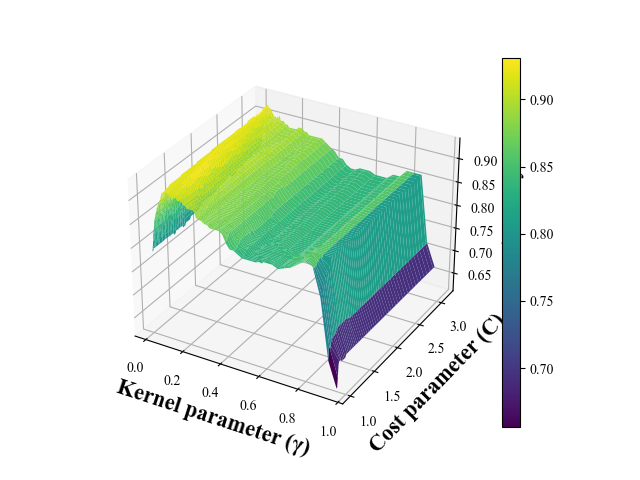

In [24]:
%matplotlib widget 
# forInteractive figures 

fig=plt.figure(5)
ax = plt.axes(projection='3d')
ax.set_xlabel('Kernel parameter (\u03B3)', fontsize=16,  fontdict=dict(weight='bold'))
ax.set_ylabel('Cost parameter (C)', fontsize=16,  fontdict=dict(weight='bold'))
ax.set_zlabel('Accuracy', fontsize=16)

gamma, C = np.meshgrid(gamma_range, C_range)
print(gamma.shape)
print(C.shape)
print(df_pivot_mean.shape)
graph = ax.plot_surface(gamma,C,df_pivot_mean,cmap=cm.viridis)
fig.colorbar(graph,ax=ax)


In [22]:
plt.close()